# Goals of this project

The goal of this project is to take NBA salary data since 1985 and see what information we can gather from it.

First we got empirica cumulative distributions to see what that was for every season.

Next we got percentiles.

Next we got the gini index.

Next we did percentiles bit adjusted them for inflation.

Next we gathered some names as examples for that a 99th percentile player or 80th percentile player might be. Im thinking I actually want to go back and change this. I think it'd be better to make a list where you see the players name, his salary, and what percentile that was. Here you can somewhat tell what type of talent a player has to be to be considered an X percentile player. Obviously, money isn't a perfect proxy for talent but it's a start.

Next I wanted to go back to the percentiles and add a dashed line that was the salary cap for that year.

Next I want to gather more information on the pareto principle and find the proper ways to break down the data to illustrate that concept too.

In [1]:
import pandas as pd 

data = pd.read_csv("./data/datadavis-nba-salaries/salaries_1985to2018.csv")

In [2]:

data.groupby(['season']).mean()

,salary,season_end,season_start
season,,,
1984-85,3.988048e+05,1985.0,1984.0
1985-86,3.701034e+05,1986.0,1985.0
1986-87,5.430333e+05,1987.0,1986.0
1987-88,4.592043e+05,1988.0,1987.0
1988-89,5.280110e+05,1989.0,1988.0
1989-90,1.670938e+06,1990.0,1989.0
1990-91,8.316232e+05,1991.0,1990.0
1991-92,9.543463e+05,1992.0,1991.0
1992-93,1.061758e+06,1993.0,1992.0


In [3]:
#data["season"].unique()
listofseasons = data.sort_values(by=['season_end'])["season_end"].unique()

In [4]:
listofseasons

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018])

In [5]:
data

,league,player_id,salary,season,season_end,season_start,team
0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings
5,NBA,abdulka01,1530000,1984-85,1985,1984,Los Angeles Lakers
6,NBA,abdulka01,2030000,1985-86,1986,1985,Los Angeles Lakers
7,NBA,abdulka01,2000000,1987-88,1988,1987,Los Angeles Lakers
8,NBA,abdulka01,3000000,1988-89,1989,1988,Los Angeles Lakers
9,NBA,abdulma02,1660000,1990-91,1991,1990,Denver Nuggets


In [6]:

seventeensalaries = data[data["season_end"]==2017]["salary"]

In [7]:
seventeensalaries
        

39        5994764
53        1914544
54        1050961
63        1465080
75        3140517
97       12500000
128       4600000
144       7643979
156      20575005
159         51449
196       4000000
237       5505618
270       7680965
283       1551659
298       1551659
307       1315448
341       1514160
359       1192080
391      18735364
424       2995421
440      24559380
463        663810
496       7806971
547       8070175
555       9904494
609       7250000
652       1227000
687        543471
742       4000000
756       4096950
           ...   
13544      874636
13586     9000000
13587     5500000
13588      259626
13595     4598000
13596      402043
13606      250000
13733     7000000
13751    12250000
13776     2200000
13800      252676
13801       50000
13848      543471
13849      181969
13919     2593440
13926     1015696
13953      874636
14019     1551659
14044     5700000
14048      100000
14050     1577280
14094       25000
14106     1052342
14118     5443918
14133    1

In [8]:
import numpy as np
import matplotlib.pyplot as plt

  
x = np.sort(seventeensalaries)
y = np.arange(1, len(x)+1)/len(x)

_ = plt.plot(x,y, marker='.',linestyle='none')
_ = plt.xlabel("NBA Salaries")
_ = plt.ylabel("Percentile")

plt.margins(0.02)
plt.show()
#plt.savefig(f'{}salarychart')

<Figure size 640x480 with 1 Axes>

In [9]:
listofseasons

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018])

In [10]:
#Gini Co
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

# Empirical Cumulative Distributions

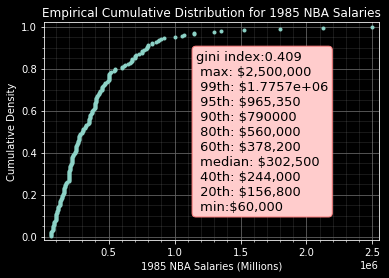

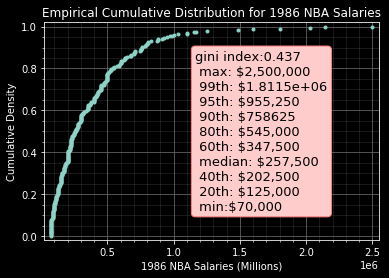

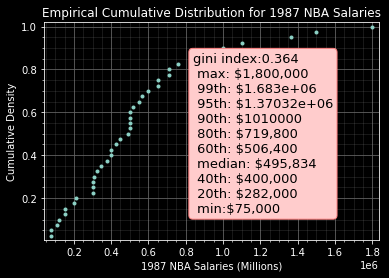

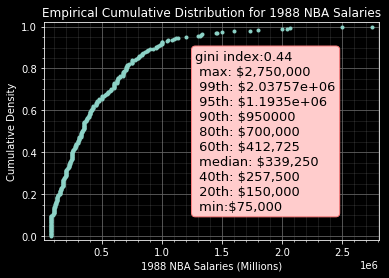

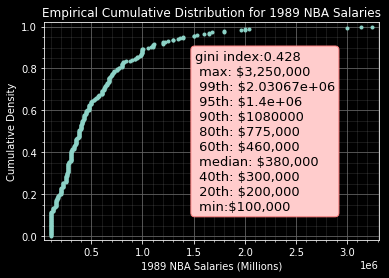

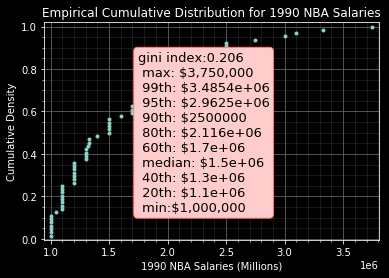

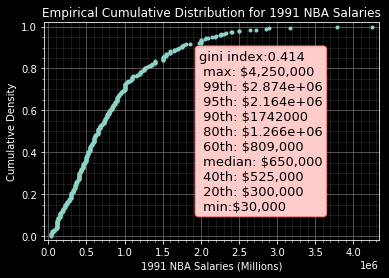

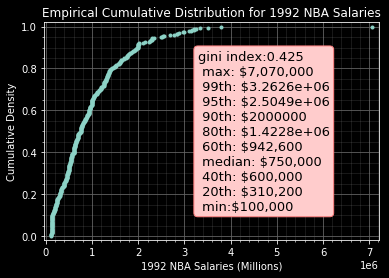

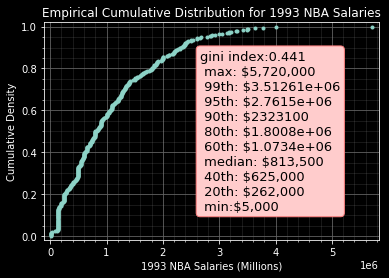

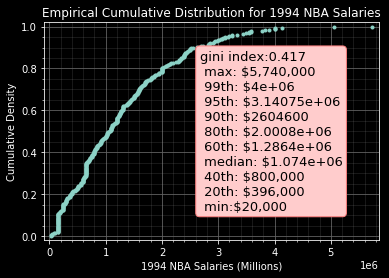

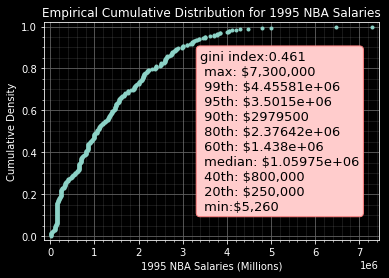

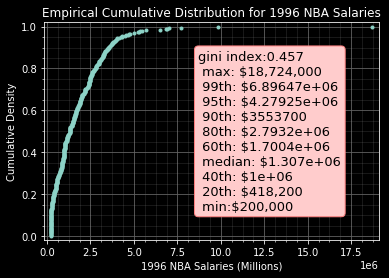

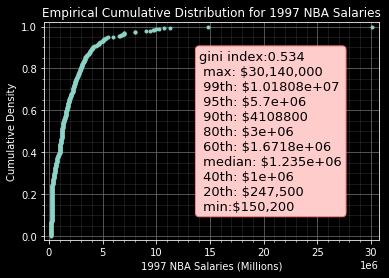

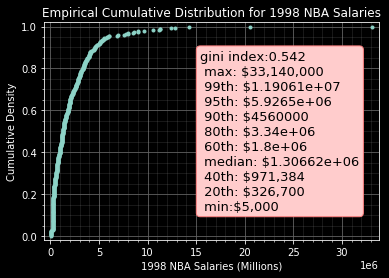

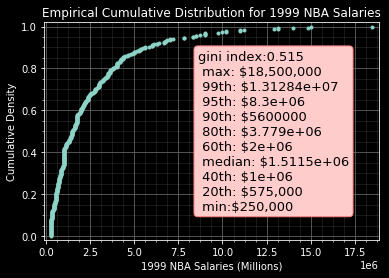

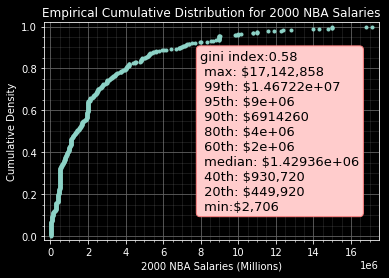

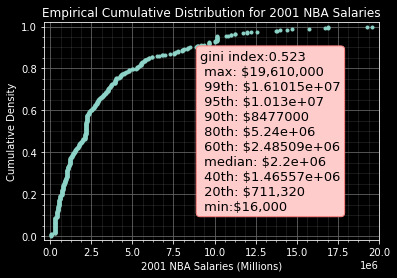

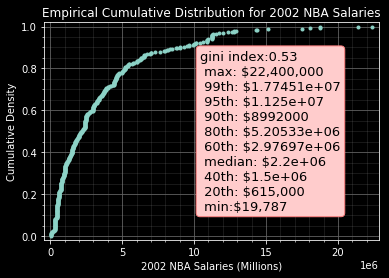

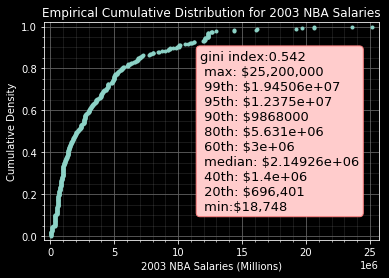

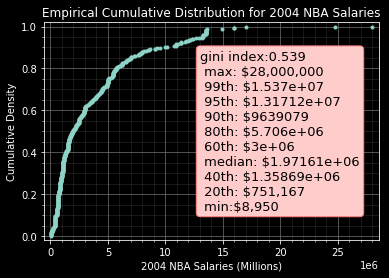

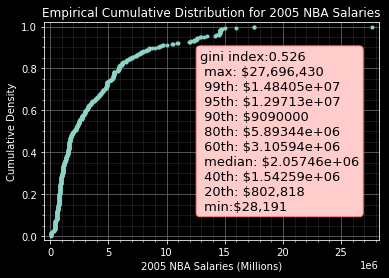

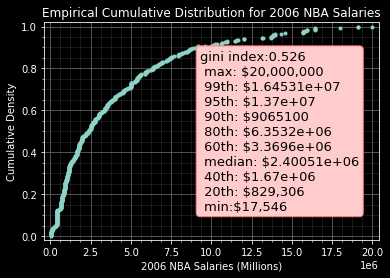

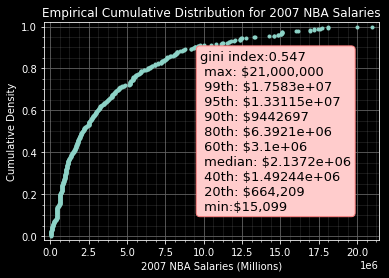

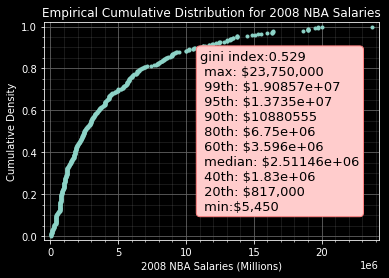

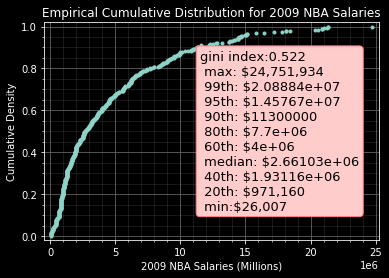

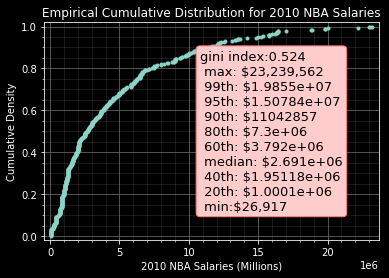

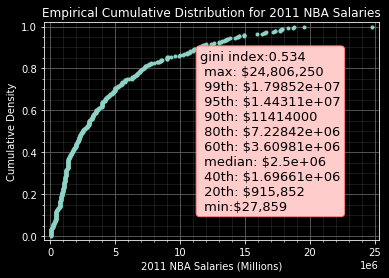

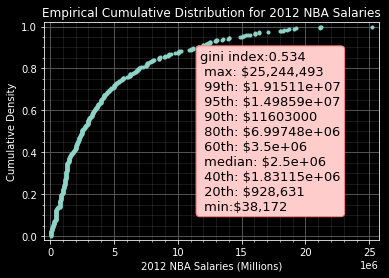

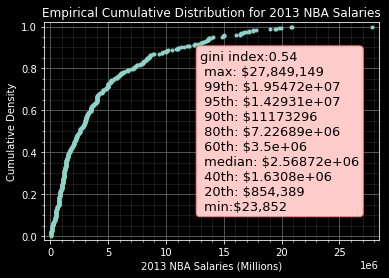

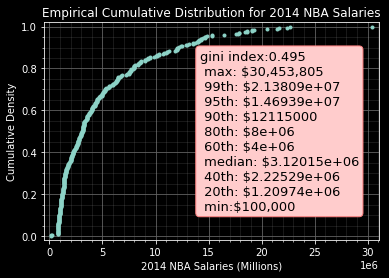

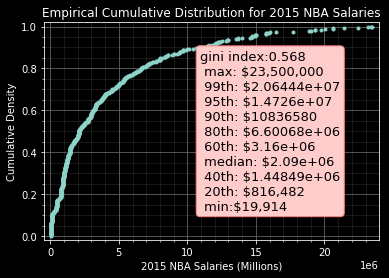

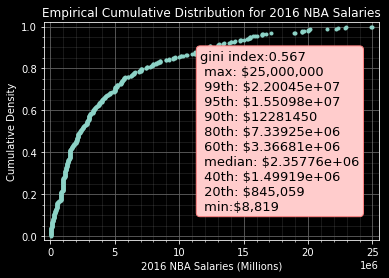

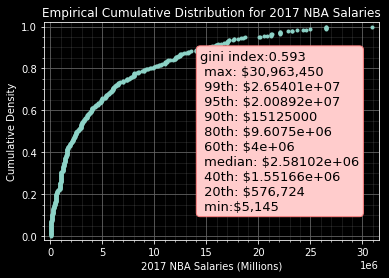

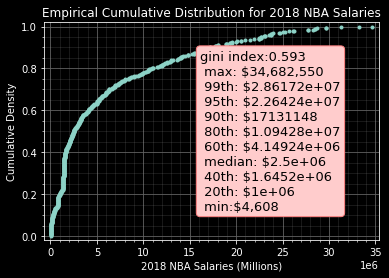

In [171]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

import numpy as np
import statistics
import locale
locale.setlocale(locale.LC_ALL, 'en_US')
ginilist = []
minimumlist = []
twentylist = []
fourtylist = []
medianlist = []
sixtylist = []
eightylist = []
ninetylist = []
ninetyfivelist = []
ninetyninelist = []
maximumlist = []

for i in listofseasons:
    
    
    
    x = np.sort(data[data["season_end"]==i]["salary"])
    y = np.arange(1, len(x)+1)/len(x)
 
    
    minimum = format(min(x), "n")
    #twenty = format(np.quantile(x, 0.2), ".0f")
    twenty = np.quantile(x, 0.2)
    twentycom = format(twenty, "n")
    fourty = np.quantile(x, 0.4)
    fourtycom = format(fourty, "n")
    mediannum = np.quantile(x, 0.5)
    mediannumcom = format(mediannum, "n")
    sixty = np.quantile(x, 0.6)
    sixtycom = format(sixty, "n")
    eighty = np.quantile(x, 0.8)
    eightycom = format(eighty, "n")
    ninety = np.quantile(x, 0.9)
    ninetycom = format(ninety, ".0f")
    ninetyfive = np.quantile(x, 0.95)
    ninetyfivecom = format(ninetyfive, "n")
    ninetynine = np.quantile(x, 0.99)
    ninetyninecom = format(ninetynine, "n")
    maximum = format(max(x), "n")
    
    minimumnum = min(x)
    twentynum = np.quantile(x, 0.2)
    fourtynum = np.quantile(x, 0.4)
    mediannumnum = np.quantile(x, 0.5)
    sixtynum = np.quantile(x, 0.6)
    eightynum = np.quantile(x, 0.8)
    ninetynum = np.quantile(x, 0.9)
    ninetyfivenum = np.quantile(x, 0.95)
    ninetyninenum = np.quantile(x, 0.99)
    maximumnum = max(x)
    
    minimumlist.append(minimumnum)
    twentylist.append(twentynum)
    fourtylist.append(fourtynum)
    medianlist.append(mediannumnum)
    sixtylist.append(sixtynum)
    eightylist.append(eightynum)
    ninetylist.append(ninetynum)
    ninetyfivelist.append(ninetyfivenum)
    ninetyninelist.append(ninetyninenum)
    maximumlist.append(maximumnum)
    
    

    _ = plt.plot(x,y, marker='.',linestyle='none')
    _ = plt.xlabel(f"{i} NBA Salaries (Millions)")
    _ = plt.ylabel("Cumulative Density")
    _ = plt.title(f"Empirical Cumulative Distribution for {i} NBA Salaries")

    plt.margins(0.02)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(6,6))
    plt.text(max(x)/2.15, 0.5, f"gini index:{round(gini(x),3)}\n max: ${maximum}\n 99th: ${ninetyninecom}\n 95th: ${ninetyfivecom}\n 90th: ${ninetycom}\n 80th: ${eightycom}\n 60th: ${sixtycom}\n median: ${mediannumcom}\n 40th: ${fourtycom}\n 20th: ${twentycom}\n min:${minimum}",
             size=13, rotation=0,
         horizontalalignment='left',verticalalignment='center', color='black',
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )




    ginilist.append(gini(x))
    
        # Show the major grid lines with dark grey lines
    plt.grid(b=True, which='major', color='#666666', linestyle='-')

    # Show the minor grid lines with very faint and almost transparent grey lines
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    
    plt.savefig(f'charts/{i}salarypercentilechart')
    plt.show()
    

In [12]:
stats = {'season': listofseasons,
         'giniindex': ginilist, 
     'min': minimumlist,
     '20th': twentylist,
     '40th': fourtylist,
     'median': medianlist,
     '60th': sixtylist,
     '80th': eightylist,
     '90th': ninetylist,
     '95th': ninetyfivelist,
     '99th': ninetyninelist,
     'max': maximumlist}

In [13]:
statsdf = pd.DataFrame(data=stats)
statsdf

,season,giniindex,min,20th,40th,median,60th,80th,90th,95th,99th,max
0,1985,0.408550,60000,156800.0,244000.0,302500.0,378200.0,560000.0,790000.0,965350.00,1775700.00,2500000
1,1986,0.436691,70000,125000.0,202500.0,257500.0,347500.0,545000.0,758625.0,955250.00,1811500.00,2500000
2,1987,0.364311,75000,282000.0,400000.0,495833.5,506400.0,719800.0,1010000.0,1370325.00,1683000.00,1800000
3,1988,0.439960,75000,150000.0,257500.0,339250.0,412725.0,700000.0,950000.0,1193500.00,2037566.34,2750000
4,1989,0.428050,100000,200000.0,300000.0,380000.0,460000.0,775000.0,1080000.0,1400000.00,2030666.40,3250000
5,1990,0.205802,1000000,1100000.0,1300000.0,1500000.0,1700000.0,2116000.0,2500000.0,2962500.00,3485400.00,3750000
6,1991,0.413863,30000,300000.0,525000.0,650000.0,809000.0,1266000.0,1742000.0,2164000.00,2874000.00,4250000
7,1992,0.425495,100000,310200.0,600000.0,750000.0,942600.0,1422800.0,2000000.0,2504900.00,3262600.00,7070000
8,1993,0.440989,5000,262000.0,625000.0,813500.0,1073400.0,1800800.0,2323100.0,2761500.00,3512610.00,5720000
9,1994,0.417156,20000,396000.0,800000.0,1074000.0,1286400.0,2000800.0,2604600.0,3140750.00,4000000.00,5740000


In [14]:
stats["giniindex"]

[0.40854998126487935,
 0.43669072675764037,
 0.364310835573489,
 0.4399597762359808,
 0.42804979247313696,
 0.20580173461754256,
 0.4138631259724773,
 0.42549455374016826,
 0.4409889656372654,
 0.41715588836307954,
 0.4612216979950848,
 0.4569015355037736,
 0.5340634330250851,
 0.5416213397266606,
 0.5150203413067493,
 0.5804785793219694,
 0.5227667318352214,
 0.530280426126526,
 0.5416938539857455,
 0.53854183586446,
 0.5255619667332899,
 0.5257926090328559,
 0.547217157142594,
 0.5293949023022078,
 0.5222267811591039,
 0.5236429519645763,
 0.5337631819650102,
 0.5339150099858918,
 0.5400843600057651,
 0.49501266334087585,
 0.5683836853050395,
 0.5667758600824593,
 0.5928437274125563,
 0.5927605454876848]

In [162]:
import numpy as np
nbasalarycap = [3600000,4233000,4945000,6164000,7232000,9802000,11871000,12500000,14000000,15175000,15964000,23000000,24363000,26900000,30000000,34000000,35500000,42500000,40271000,43840000,43870000,49500000,53135000,55630000,58680000,57700000,58044000,58044000,58044000,58679000,63065000,70000000,94143000,99093000]
nbasalarycaparray = np.asarray(nbasalarycap)

In [163]:
nbasalarycapinfo = {'season': listofseasons,
                    'nbasalarycap': nbasalarycaparray}
len(nbasalarycaparray)

34

In [164]:
nbasalarycapinfo

{'season': array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
        1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
        2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
        2018]),
 'nbasalarycap': array([ 3600000,  4233000,  4945000,  6164000,  7232000,  9802000,
        11871000, 12500000, 14000000, 15175000, 15964000, 23000000,
        24363000, 26900000, 30000000, 34000000, 35500000, 42500000,
        40271000, 43840000, 43870000, 49500000, 53135000, 55630000,
        58680000, 57700000, 58044000, 58044000, 58044000, 58679000,
        63065000, 70000000, 94143000, 99093000])}

In [165]:
nbasalarycapinfodf = pd.DataFrame(data=nbasalarycapinfo)
nbasalarycapinfodf

,season,nbasalarycap
0,1985,3600000
1,1986,4233000
2,1987,4945000
3,1988,6164000
4,1989,7232000
5,1990,9802000
6,1991,11871000
7,1992,12500000
8,1993,14000000
9,1994,15175000


# Percentiles Not Adjusted For Inflation and No Salary Cap

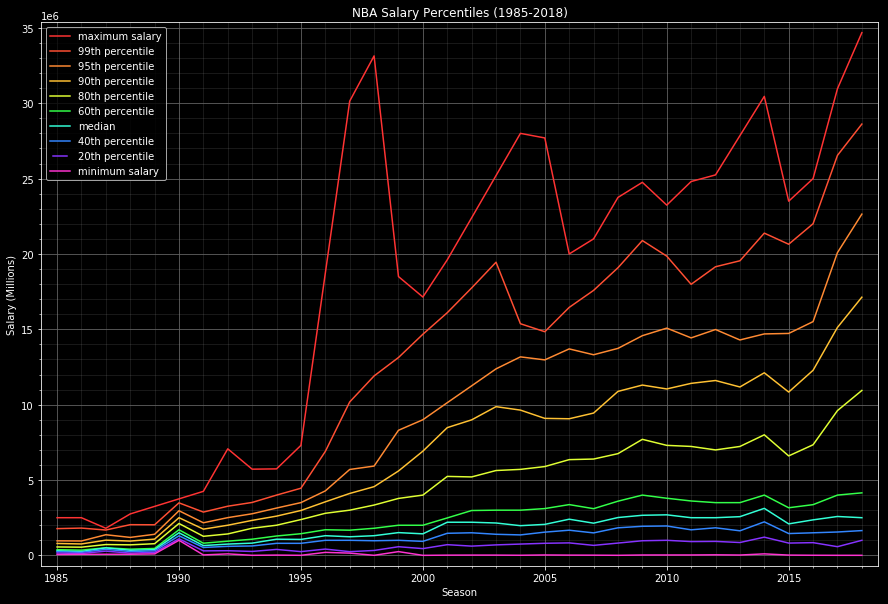

In [172]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import numpy as np
style.use('dark_background')

fig = plt.figure(figsize=(15,10))
ax = plt.axes()
plt.margins(0.02)
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6))
_ = plt.xlabel("Season")
_ = plt.ylabel("Salary (Millions)")
_ = plt.title("NBA Salary Percentiles (1985-2018)")


# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# line1, = plt.plot([3,2,1], marker='o', label='Line 1')
# line2, = plt.plot([1,2,3], marker='o', label='Line 2')

#salarycapline, = plt.plot(stats["season"], nbasalarycapinfo["nbasalarycap"], color='white', label='salary cap')
maxline, = plt.plot(stats["season"], stats["max"], color='#FF3333', label='maximum salary')
ninetynineline, = plt.plot(stats["season"], stats["99th"], color='#FF4F33', label='99th percentile')
ninetyfiveline, = plt.plot(stats["season"], stats["95th"], color='#FF8A33', label='95th percentile')
ninetyline, = plt.plot(stats["season"], stats["90th"], color='#FFC133', label='90th percentile')
eightyline, = plt.plot(stats["season"], stats["80th"], color='#E0FF33', label='80th percentile')
sixtyline, = plt.plot(stats["season"], stats["60th"], color='#33FF49', label='60th percentile')
medianline = plt.plot(stats["season"], stats["median"], color='#33FFD7', label='median')
fourtyline, = plt.plot(stats["season"], stats["40th"], color='#3386FF', label='40th percentile')
twentyline, = plt.plot(stats["season"], stats["20th"], color='#8633FF', label='20th percentile')
minline, = plt.plot(stats["season"], stats["min"], color='#FF33D1', label='minimum salary')



plt.legend(handler_map={twentyline: HandlerLine2D(numpoints=34)})
plt.savefig(f'charts/NBASal%tile85-18',bbox_inches='tight')

# Percentiles Not Adjusted For Inflation and with Salary Cap

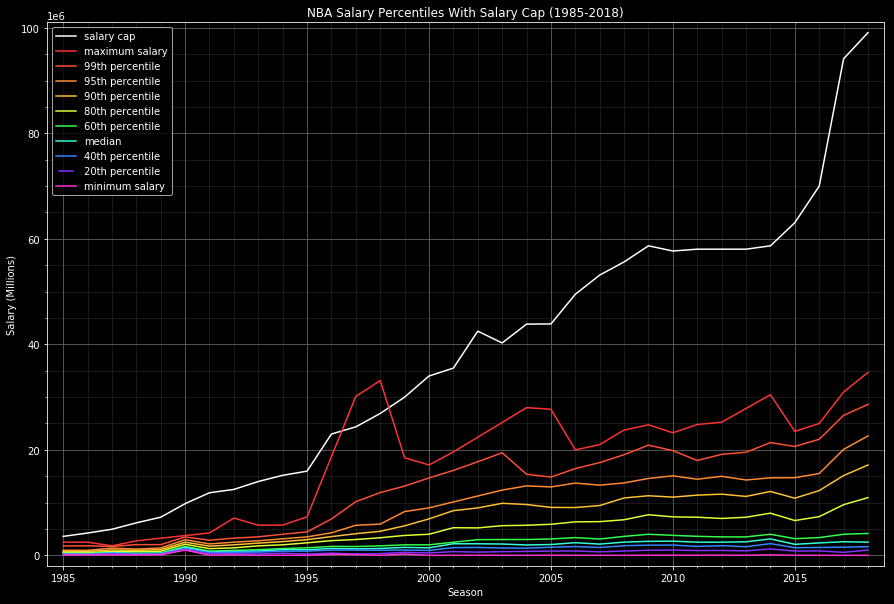

In [173]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import numpy as np
style.use('dark_background')

fig = plt.figure(figsize=(15,10))
ax = plt.axes()
plt.margins(0.02)
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6))
_ = plt.xlabel("Season")
_ = plt.ylabel("Salary (Millions)")
_ = plt.title("NBA Salary Percentiles With Salary Cap (1985-2018)")


# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# line1, = plt.plot([3,2,1], marker='o', label='Line 1')
# line2, = plt.plot([1,2,3], marker='o', label='Line 2')

salarycapline, = plt.plot(stats["season"], nbasalarycapinfo["nbasalarycap"], color='white', label='salary cap')
maxline, = plt.plot(stats["season"], stats["max"], color='#FF3333', label='maximum salary')
ninetynineline, = plt.plot(stats["season"], stats["99th"], color='#FF4F33', label='99th percentile')
ninetyfiveline, = plt.plot(stats["season"], stats["95th"], color='#FF8A33', label='95th percentile')
ninetyline, = plt.plot(stats["season"], stats["90th"], color='#FFC133', label='90th percentile')
eightyline, = plt.plot(stats["season"], stats["80th"], color='#E0FF33', label='80th percentile')
sixtyline, = plt.plot(stats["season"], stats["60th"], color='#33FF49', label='60th percentile')
medianline = plt.plot(stats["season"], stats["median"], color='#33FFD7', label='median')
fourtyline, = plt.plot(stats["season"], stats["40th"], color='#3386FF', label='40th percentile')
twentyline, = plt.plot(stats["season"], stats["20th"], color='#8633FF', label='20th percentile')
minline, = plt.plot(stats["season"], stats["min"], color='#FF33D1', label='minimum salary')



plt.legend(handler_map={twentyline: HandlerLine2D(numpoints=34)})
plt.savefig(f'charts/NBASal%tile85-18withsalarycap',bbox_inches='tight')

# Gini Index

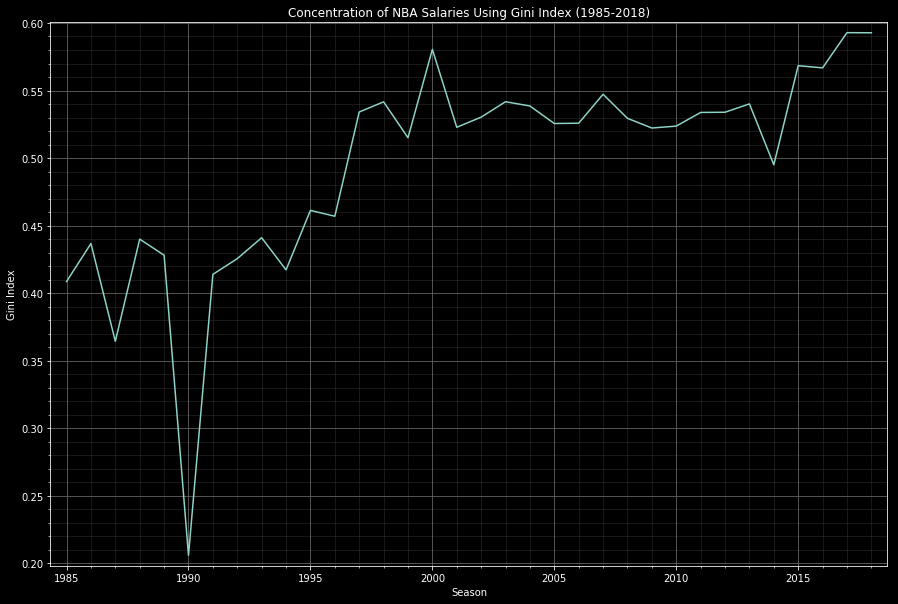

In [174]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
style.use('dark_background')

fig = plt.figure(figsize=(15,10))
ax = plt.axes()

# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.margins(0.02)
_ = plt.xlabel("Season")
_ = plt.ylabel("Gini Index")
_ = plt.title("Concentration of NBA Salaries Using Gini Index (1985-2018)")


plt.plot(stats["season"], stats["giniindex"])
plt.savefig(f'charts/{i}giniindexchart',bbox_inches='tight');

# INFLATION ADJUSTMENT

In [19]:
import cpi
cpi.update()
cpi.inflate(100, 1950)

1041.9377593360996

In [20]:
cpi.inflate(150, 1960)

1272.5016891891892

In [43]:
#for lat, long in zip(Latitudes, Longitudes):
#    print lat, long



adjminimumlist = []
adjtwentylist = []
adjfourtylist = []
adjmedianlist = []
adjsixtylist = []
adjeightylist = []
adjninetylist = []
adjninetyfivelist = []
adjninetyninelist = []
adjmaximumlist = []

adjnbasalarycaplist = []


for i,j,k,l,m,n,o,p,q,r,s,yeariterator in zip(stats["min"],stats["20th"],stats["40th"],stats["median"],stats["60th"],stats["80th"],stats["90th"],stats["95th"],stats["99th"],stats["max"],nbasalarycapinfo["nbasalarycap"],stats["season"]):
    
    adjminimumlist.append(cpi.inflate(i, yeariterator, to=2018))
    adjtwentylist.append(cpi.inflate(j, yeariterator, to=2018))
    adjfourtylist.append(cpi.inflate(k, yeariterator, to=2018))
    adjmedianlist.append(cpi.inflate(l, yeariterator, to=2018))
    adjsixtylist.append(cpi.inflate(m, yeariterator, to=2018))
    adjeightylist.append(cpi.inflate(n, yeariterator, to=2018))
    adjninetylist.append(cpi.inflate(o, yeariterator, to=2018))
    adjninetyfivelist.append(cpi.inflate(p, yeariterator, to=2018))
    adjninetyninelist.append(cpi.inflate(q, yeariterator, to=2018))
    adjmaximumlist.append(cpi.inflate(r, yeariterator, to=2018))
    adjnbasalarycaplist.append(cpi.inflate(s, yeariterator, to=2018))

In [44]:
adjstats = {'season': listofseasons,
            'adjnbasalarycap': adjnbasalarycaplist,
             'giniindex': ginilist, 
             'adjmin': adjminimumlist,
             'adj20th': adjtwentylist,
             'adj40th': adjfourtylist,
             'adjmedian': adjmedianlist,
             'adj60th': adjsixtylist,
             'adj80th': adjeightylist,
             'adj90th': adjninetylist,
             'adj95th': adjninetyfivelist,
             'adj99th': adjninetyninelist,
             'adjmax': adjmaximumlist}

In [46]:
adjstatsdf = pd.DataFrame(data=adjstats)
adjstatsdf

,season,adjnbasalarycap,giniindex,adjmin,adj20th,adj40th,adjmedian,adj60th,adj80th,adj90th,adj95th,adj99th,adjmax
0,1985,8.401349e+06,0.408550,1.400225e+05,3.659254e+05,5.694248e+05,7.059467e+05,8.826084e+05,1.306877e+06,1.843629e+06,2.252845e+06,4.143966e+06,5.834270e+06
1,1986,9.698321e+06,0.436691,1.603786e+05,2.863903e+05,4.639523e+05,5.899640e+05,7.961650e+05,1.248662e+06,1.738103e+06,2.188595e+06,4.150368e+06,5.727806e+06
2,1987,1.093067e+07,0.364311,1.657837e+05,6.233466e+05,8.841796e+05,1.096015e+06,1.119371e+06,1.591081e+06,2.232553e+06,3.029033e+06,3.720186e+06,3.978808e+06
3,1988,1.308388e+07,0.439960,1.591972e+05,3.183943e+05,5.465769e+05,7.201019e+05,8.760620e+05,1.485840e+06,2.016497e+06,2.533358e+06,4.324997e+06,5.837230e+06
4,1989,1.464521e+07,0.428050,2.025056e+05,4.050113e+05,6.075169e+05,7.695215e+05,9.315260e+05,1.569419e+06,2.187061e+06,2.835079e+06,4.112214e+06,6.581433e+06
5,1990,1.883206e+07,0.205802,1.921247e+06,2.113372e+06,2.497621e+06,2.881871e+06,3.266120e+06,4.065359e+06,4.803118e+06,5.691695e+06,6.696315e+06,7.204677e+06
6,1991,2.188613e+07,0.413863,5.530991e+04,5.530991e+05,9.679235e+05,1.198381e+06,1.491524e+06,2.334078e+06,3.211662e+06,3.989688e+06,5.298690e+06,7.835571e+06
7,1992,2.237233e+07,0.425495,1.789786e+05,5.551917e+05,1.073872e+06,1.342340e+06,1.687052e+06,2.546508e+06,3.579572e+06,4.483235e+06,5.839356e+06,1.265379e+07
8,1993,2.432871e+07,0.440989,8.688824e+03,4.552944e+05,1.086103e+06,1.413672e+06,1.865317e+06,3.129367e+06,4.037001e+06,4.798837e+06,6.104090e+06,9.940014e+06
9,1994,2.571220e+07,0.417156,3.388758e+04,6.709742e+05,1.355503e+06,1.819763e+06,2.179649e+06,3.390114e+06,4.413180e+06,5.321622e+06,6.777517e+06,9.725737e+06


# Percentiles Adjusted For Inflation and No Salary Cap

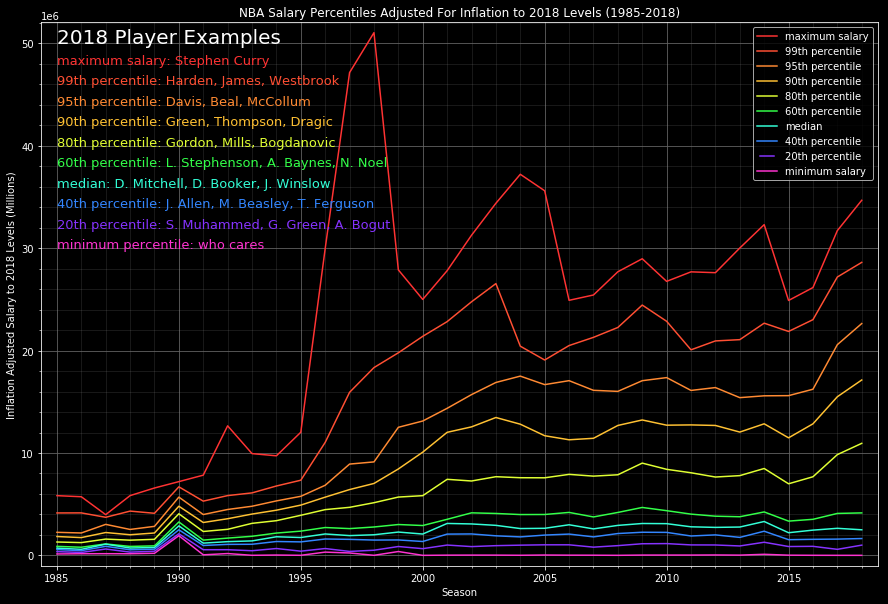

In [175]:
style.use('dark_background')

fig = plt.figure(figsize=(15,10))
ax = plt.axes()
plt.margins(0.02)
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6))
_ = plt.xlabel("Season")
_ = plt.ylabel("Inflation Adjusted Salary to 2018 Levels (Millions)")
_ = plt.title("NBA Salary Percentiles Adjusted For Inflation to 2018 Levels (1985-2018)")


plt.text(1985, 50000000, r'2018 Player Examples', {'color': 'white', 'fontsize': 20})
plt.text(1985, 48000000, r'maximum salary: Stephen Curry', {'color': '#FF3333', 'fontsize': 13})
plt.text(1985, 46000000, r'99th percentile: Harden, James, Westbrook', {'color': '#FF4F33', 'fontsize': 13})
plt.text(1985, 44000000, r'95th percentile: Davis, Beal, McCollum', {'color': '#FF8A33', 'fontsize': 13})
plt.text(1985, 42000000, r'90th percentile: Green, Thompson, Dragic', {'color': '#FFC133', 'fontsize': 13})
plt.text(1985, 40000000, r'80th percentile: Gordon, Mills, Bogdanovic', {'color': '#E0FF33', 'fontsize': 13})
plt.text(1985, 38000000, r'60th percentile: L. Stephenson, A. Baynes, N. Noel', {'color': '#33FF49', 'fontsize': 13})
plt.text(1985, 36000000, r'median: D. Mitchell, D. Booker, J. Winslow', {'color': '#33FFD7', 'fontsize': 13})
plt.text(1985, 34000000, r'40th percentile: J. Allen, M. Beasley, T. Ferguson', {'color': '#3386FF', 'fontsize': 13})
plt.text(1985, 32000000, r'20th percentile: S. Muhammed, G. Green, A. Bogut', {'color': '#8633FF', 'fontsize': 13})
plt.text(1985, 30000000, r'minimum percentile: who cares', {'color': '#FF33D1', 'fontsize': 13})

# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# line1, = plt.plot([3,2,1], marker='o', label='Line 1')
# line2, = plt.plot([1,2,3], marker='o', label='Line 2')

#salarycapline, = plt.plot(adjstats["season"], adjstats["adjnbasalarycap"], color='white', label='salary cap')
maxline, = plt.plot(adjstats["season"], adjstats["adjmax"], color='#FF3333', label='maximum salary')
ninetynineline, = plt.plot(adjstats["season"], adjstats["adj99th"], color='#FF4F33', label='99th percentile')
ninetyfiveline, = plt.plot(adjstats["season"], adjstats["adj95th"], color='#FF8A33', label='95th percentile')
ninetyline, = plt.plot(adjstats["season"], adjstats["adj90th"], color='#FFC133', label='90th percentile')
eightyline, = plt.plot(adjstats["season"], adjstats["adj80th"], color='#E0FF33', label='80th percentile')
sixtyline, = plt.plot(adjstats["season"], adjstats["adj60th"], color='#33FF49', label='60th percentile')
medianline = plt.plot(adjstats["season"], adjstats["adjmedian"], color='#33FFD7', label='median')
fourtyline, = plt.plot(adjstats["season"], adjstats["adj40th"], color='#3386FF', label='40th percentile')
twentyline, = plt.plot(adjstats["season"], adjstats["adj20th"], color='#8633FF', label='20th percentile')
minline, = plt.plot(adjstats["season"], adjstats["adjmin"], color='#FF33D1', label='minimum salary')



plt.legend(handler_map={twentyline: HandlerLine2D(numpoints=34)})
plt.savefig(f'charts/NBASal%tile85-18AdjforInflation',bbox_inches='tight')

# Percentiles Adjusted For Inflation and with Salary Cap

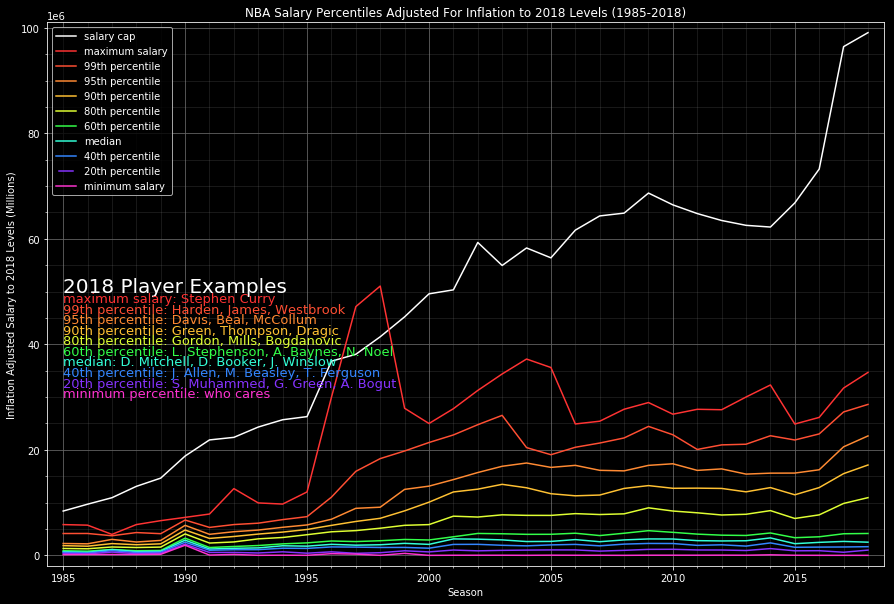

In [176]:
style.use('dark_background')

fig = plt.figure(figsize=(15,10))
ax = plt.axes()
plt.margins(0.02)
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6))
_ = plt.xlabel("Season")
_ = plt.ylabel("Inflation Adjusted Salary to 2018 Levels (Millions)")
_ = plt.title("NBA Salary Percentiles Adjusted For Inflation to 2018 Levels (1985-2018)")


plt.text(1985, 50000000, r'2018 Player Examples', {'color': 'white', 'fontsize': 20})
plt.text(1985, 48000000, r'maximum salary: Stephen Curry', {'color': '#FF3333', 'fontsize': 13})
plt.text(1985, 46000000, r'99th percentile: Harden, James, Westbrook', {'color': '#FF4F33', 'fontsize': 13})
plt.text(1985, 44000000, r'95th percentile: Davis, Beal, McCollum', {'color': '#FF8A33', 'fontsize': 13})
plt.text(1985, 42000000, r'90th percentile: Green, Thompson, Dragic', {'color': '#FFC133', 'fontsize': 13})
plt.text(1985, 40000000, r'80th percentile: Gordon, Mills, Bogdanovic', {'color': '#E0FF33', 'fontsize': 13})
plt.text(1985, 38000000, r'60th percentile: L. Stephenson, A. Baynes, N. Noel', {'color': '#33FF49', 'fontsize': 13})
plt.text(1985, 36000000, r'median: D. Mitchell, D. Booker, J. Winslow', {'color': '#33FFD7', 'fontsize': 13})
plt.text(1985, 34000000, r'40th percentile: J. Allen, M. Beasley, T. Ferguson', {'color': '#3386FF', 'fontsize': 13})
plt.text(1985, 32000000, r'20th percentile: S. Muhammed, G. Green, A. Bogut', {'color': '#8633FF', 'fontsize': 13})
plt.text(1985, 30000000, r'minimum percentile: who cares', {'color': '#FF33D1', 'fontsize': 13})

# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# line1, = plt.plot([3,2,1], marker='o', label='Line 1')
# line2, = plt.plot([1,2,3], marker='o', label='Line 2')

salarycapline, = plt.plot(adjstats["season"], adjstats["adjnbasalarycap"], color='white', label='salary cap')
maxline, = plt.plot(adjstats["season"], adjstats["adjmax"], color='#FF3333', label='maximum salary')
ninetynineline, = plt.plot(adjstats["season"], adjstats["adj99th"], color='#FF4F33', label='99th percentile')
ninetyfiveline, = plt.plot(adjstats["season"], adjstats["adj95th"], color='#FF8A33', label='95th percentile')
ninetyline, = plt.plot(adjstats["season"], adjstats["adj90th"], color='#FFC133', label='90th percentile')
eightyline, = plt.plot(adjstats["season"], adjstats["adj80th"], color='#E0FF33', label='80th percentile')
sixtyline, = plt.plot(adjstats["season"], adjstats["adj60th"], color='#33FF49', label='60th percentile')
medianline = plt.plot(adjstats["season"], adjstats["adjmedian"], color='#33FFD7', label='median')
fourtyline, = plt.plot(adjstats["season"], adjstats["adj40th"], color='#3386FF', label='40th percentile')
twentyline, = plt.plot(adjstats["season"], adjstats["adj20th"], color='#8633FF', label='20th percentile')
minline, = plt.plot(adjstats["season"], adjstats["adjmin"], color='#FF33D1', label='minimum salary')



plt.legend(handler_map={twentyline: HandlerLine2D(numpoints=34)})
plt.savefig(f'charts/NBASal%tile85-18AdjforInflationwithsalarycap',bbox_inches='tight')

In [25]:
data

,league,player_id,salary,season,season_end,season_start,team
0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings
5,NBA,abdulka01,1530000,1984-85,1985,1984,Los Angeles Lakers
6,NBA,abdulka01,2030000,1985-86,1986,1985,Los Angeles Lakers
7,NBA,abdulka01,2000000,1987-88,1988,1987,Los Angeles Lakers
8,NBA,abdulka01,3000000,1988-89,1989,1988,Los Angeles Lakers
9,NBA,abdulma02,1660000,1990-91,1991,1990,Denver Nuggets


In [77]:
eighteensalaries = data.loc[(data["season_end"] == 2018)].sort_values(by=['salary'], ascending=False).reset_index()
len(eighteensalaries)

551

In [73]:
topwentypercent = eighteensalaries[0:110]
toptwentypercentincometotal = topwentypercent["salary"].sum()
toptwentypercentincometotal

2057130896

In [74]:
bottomeightypercent = eighteensalaries[110:]
bottomeightypercentincometotal = bottomeightypercent["salary"].sum()
bottomeightypercentincometotal

1254934379

In [88]:
totaleighteensalaries = toptwentypercentincometotal + bottomeightypercentincometotal

In [89]:
toptwentypercentincometotal/totaleighteensalaries

0.6211021598902515

In [103]:
listoffractions = []
for i in listofseasons:
    orderedlistofsalaries = data.loc[(data["season_end"] == i)].sort_values(by=['salary'], ascending=False).reset_index()
    lengthofsalarylist = len(orderedlistofsalaries)
    twentypct = round(lengthofsalarylist * 0.2)
    eightypct = lengthofsalarylist - twentypct
    toptwentypctearners = orderedlistofsalaries[0:twentypct]
    bottomeightypctearners = orderedlistofsalaries[twentypct:]
    toptwentypcttotalincome = toptwentypctearners["salary"].sum()
    bottomtwentypcttotalincome = bottomeightypctearners["salary"].sum()
    totalsalaryincome = toptwentypcttotalincome + bottomtwentypcttotalincome
    fraction = [toptwentypcttotalincome/totalsalaryincome, bottomtwentypcttotalincome/totalsalaryincome]
    listoffractions.append(fraction)

In [143]:
listoffractionsarray = np.asarray(listoffractions)

In [144]:
twentyeightyfracandlistofseasons = {'season': listofseasons,
                    'twentyeightyfracs': listoffractionsarray}

In [147]:
twentyeightyfracandlistofseasons["twentyeightyfracs"][0]

array([0.46689513, 0.53310487])

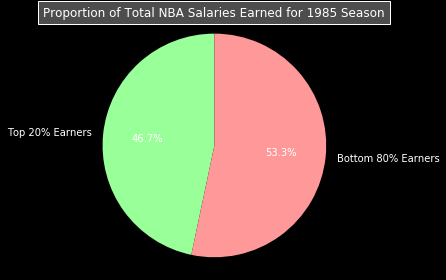

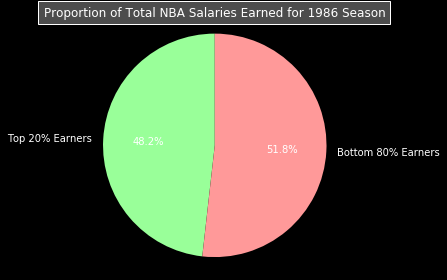

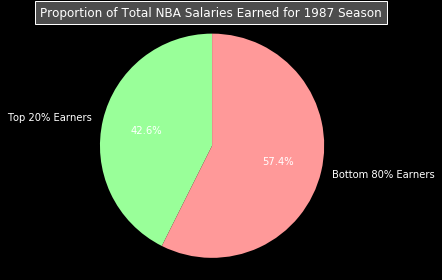

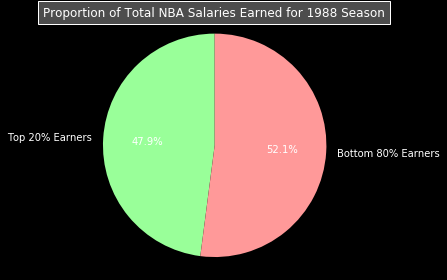

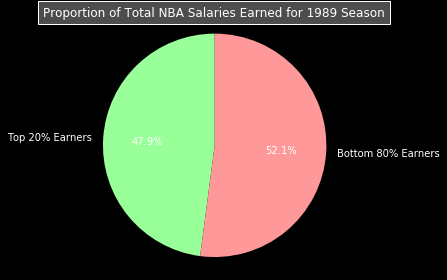

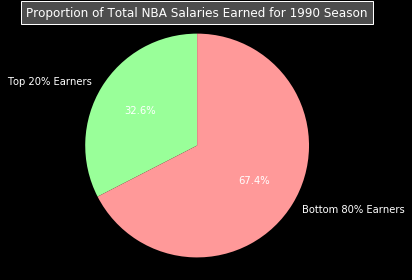

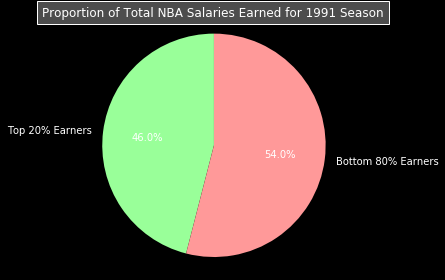

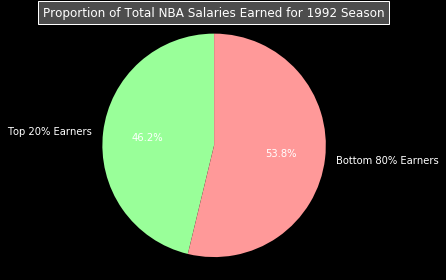

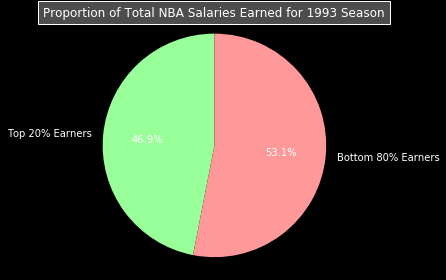

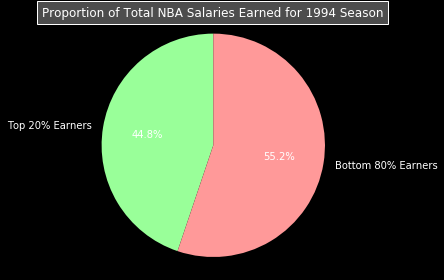

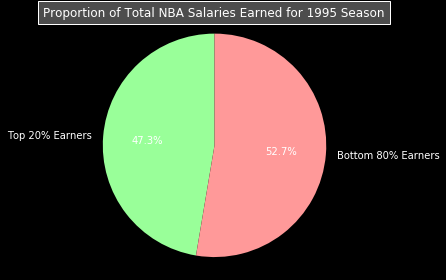

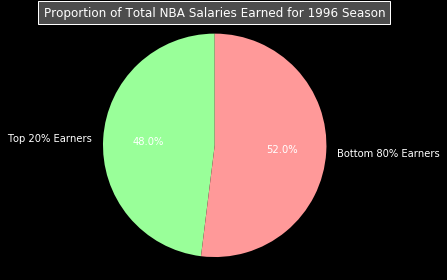

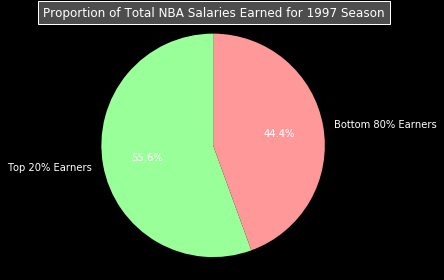

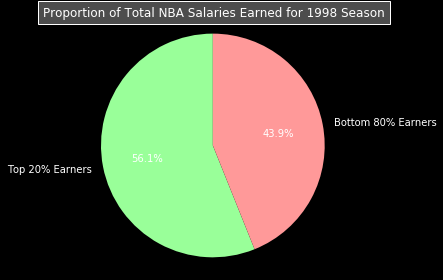

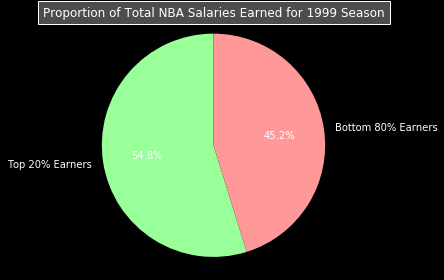

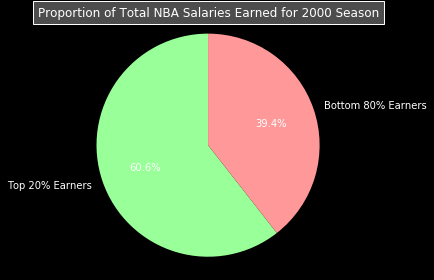

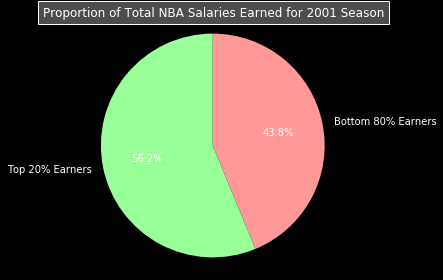

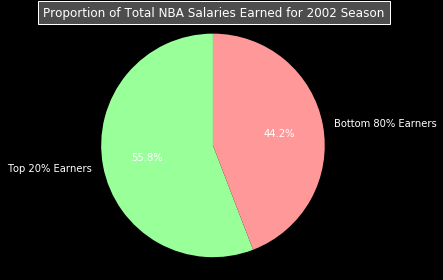

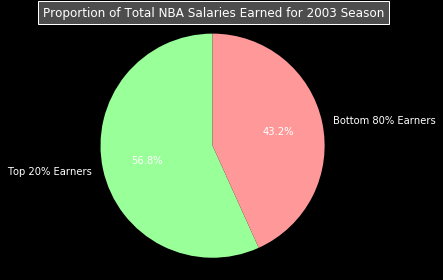

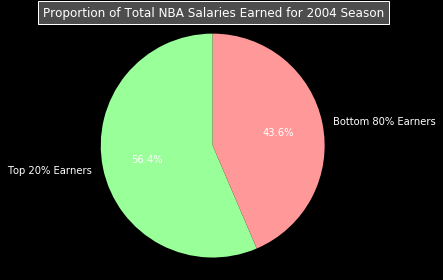

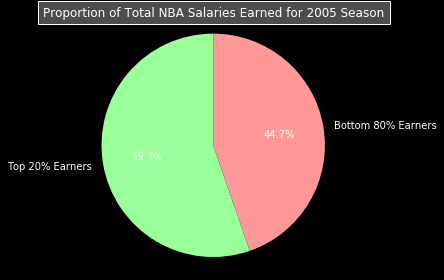

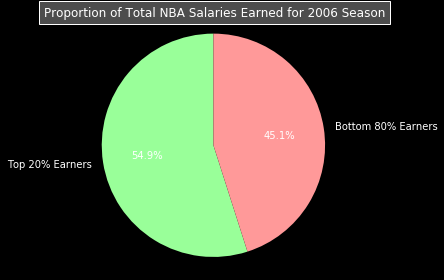

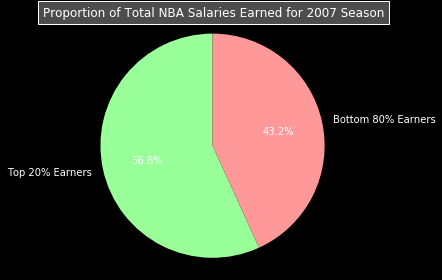

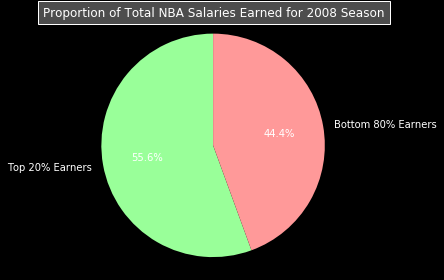

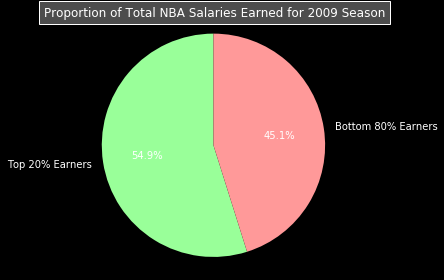

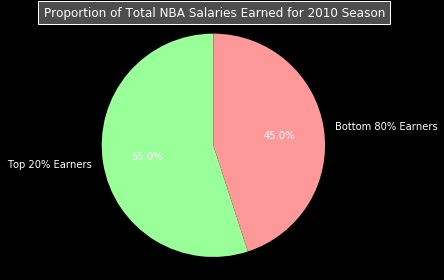

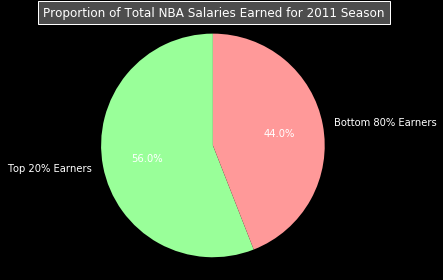

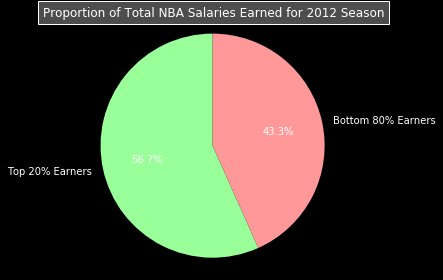

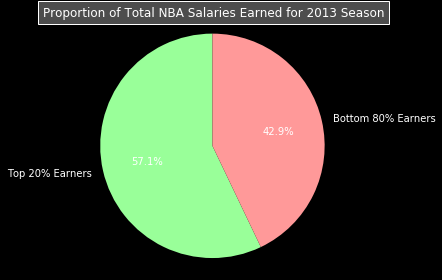

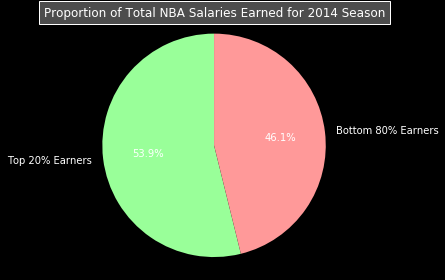

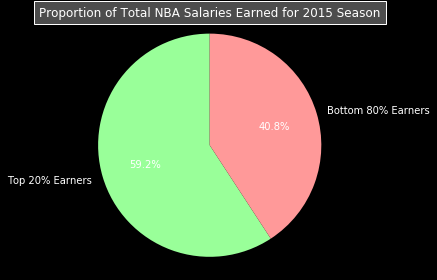

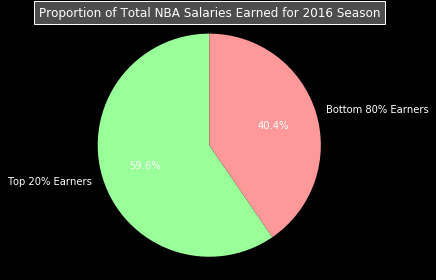

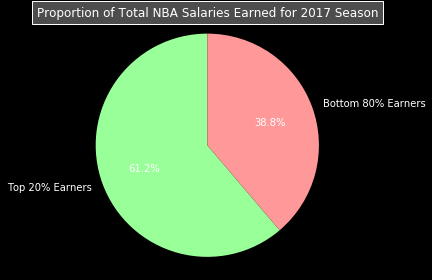

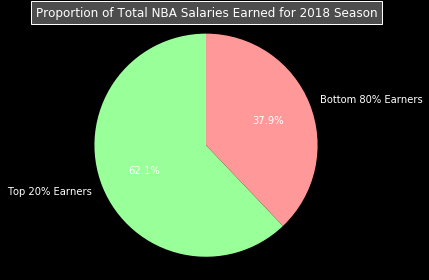

In [177]:
import matplotlib.pyplot as plt
    
for i,j in zip(twentyeightyfracandlistofseasons["season"], twentyeightyfracandlistofseasons["twentyeightyfracs"]):
    # Pie chart
    labels = ['Top 20% Earners', 'Bottom 80% Earners']
    sizes = j
    #colors
    colors = ['#99ff99', '#ff9999']

    fig1, ax1 = plt.subplots()
    patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
    for text in texts:
        text.set_color('white')
    for autotext in autotexts:
        autotext.set_color('white')
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal') 
    plt.title(f"Proportion of Total NBA Salaries Earned for {i} Season", bbox={'facecolor':'0.3', 'pad':5})

    plt.tight_layout()
    plt.savefig(f'charts/proportionpiechart{i}')
    plt.show()

In [184]:
import plotly.figure_factory as ff

df = [dict(Task="Job-1", Start='2017-01-01', Finish='2017-02-02', Resource='Complete'),
      dict(Task="Job-1", Start='2017-02-15', Finish='2017-03-15', Resource='Incomplete'),
      dict(Task="Job-2", Start='2017-01-17', Finish='2017-02-17', Resource='Not Started'),
      dict(Task="Job-2", Start='2017-01-17', Finish='2017-02-17', Resource='Complete'),
      dict(Task="Job-3", Start='2017-03-10', Finish='2017-03-20', Resource='Not Started'),
      dict(Task="Job-3", Start='2017-04-01', Finish='2017-04-20', Resource='Not Started'),
      dict(Task="Job-3", Start='2017-05-18', Finish='2017-06-18', Resource='Not Started'),
      dict(Task="Job-4", Start='2017-01-14', Finish='2017-03-14', Resource='Complete')]

colors = {'Not Started': 'rgb(220, 0, 0)',
          'Incomplete': (1, 0.9, 0.16),
          'Complete': 'rgb(0, 255, 100)'}

fig = ff.create_gantt(df, colors=colors, index_col='Resource', show_colorbar=True,
                      group_tasks=True)
fig.show()

ModuleNotFoundError: No module named 'plotly'

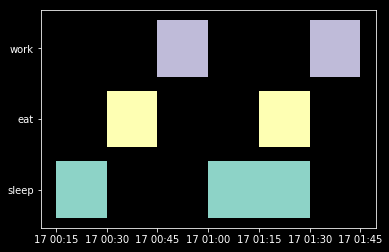

In [189]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection

data = [    (dt.datetime(2018, 7, 17, 0, 15), dt.datetime(2018, 7, 17, 0, 30), 'sleep'),
            (dt.datetime(2018, 7, 17, 0, 30), dt.datetime(2018, 7, 17, 0, 45), 'eat'),
            (dt.datetime(2018, 7, 17, 0, 45), dt.datetime(2018, 7, 17, 1, 0), 'work'),
            (dt.datetime(2018, 7, 17, 1, 0), dt.datetime(2018, 7, 17, 1, 30), 'sleep'),
            (dt.datetime(2018, 7, 17, 1, 15), dt.datetime(2018, 7, 17, 1, 30), 'eat'), 
            (dt.datetime(2018, 7, 17, 1, 30), dt.datetime(2018, 7, 17, 1, 45), 'work')
        ]

cats = {"sleep" : 1, "eat" : 2, "work" : 3}
colormapping = {"sleep" : "C0", "eat" : "C1", "work" : "C2"}

verts = []
colors = []
for d in data:
    v =  [(mdates.date2num(d[0]), cats[d[2]]-.4),
          (mdates.date2num(d[0]), cats[d[2]]+.4),
          (mdates.date2num(d[1]), cats[d[2]]+.4),
          (mdates.date2num(d[1]), cats[d[2]]-.4),
          (mdates.date2num(d[0]), cats[d[2]]-.4)]
    verts.append(v)
    colors.append(colormapping[d[2]])

bars = PolyCollection(verts, facecolors=colors)

fig, ax = plt.subplots()
ax.add_collection(bars)
ax.autoscale()
loc = mdates.MinuteLocator(byminute=[0,15,30,45])
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

ax.set_yticks([1,2,3])
ax.set_yticklabels(["sleep", "eat", "work"])
plt.show()

<BarContainer object of 3 artists>

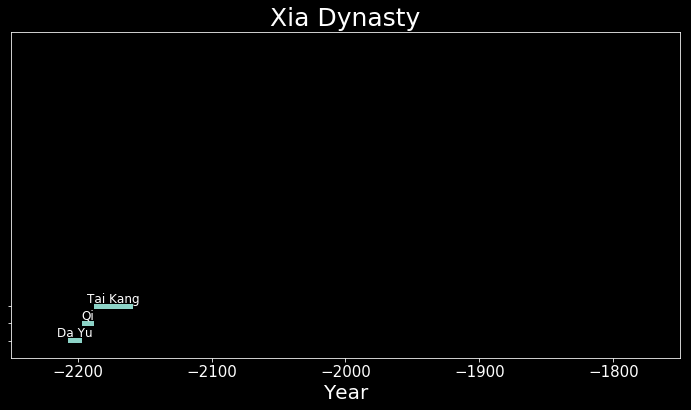

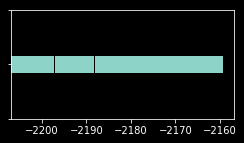

In [190]:
import pandas as pd
import matplotlib.pyplot as plt

xia = pd.DataFrame([['Da Yu', -2207, -2197], 
                    ['Qi', -2197, -2188], 
                    ['Tai Kang', -2188, -2159]], 
                    columns=['EnglishName', 'Start', 'Finish']) 
event = xia['EnglishName']
begin = xia['Start']
end = xia['Finish']
length =  xia['Finish'] - xia['Start']


plt.figure(figsize=(12,6))
plt.barh(range(len(begin)), (end-begin), .3, left=begin)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.title('Xia Dynasty', fontsize = '25')
plt.xlabel('Year', fontsize = '20')
plt.yticks(range(len(begin)), "")
plt.xlim(-2250, -1750)
plt.ylim(-1,18)
for i in range(3):
    plt.text(begin.iloc[i] + length.iloc[i]/2, 
             i+.25, event.iloc[i], 
             ha='center', fontsize = '12')

plt.figure(figsize=(4,2))
plt.ylim(0.5, 1.5)
plt.yticks(range(len(begin)), "")
# 0.25 is a stub, it controls for white separator
plt.barh([1 for _ in begin], (end-begin)-0.25, .3, left=begin)